In [1]:
import xarray as xr

<jemalloc>: MADV_DONTNEED does not work (memset will be used instead)
<jemalloc>: (This is the expected behaviour if you are running under QEMU)


In [2]:
from pathlib import Path

datadir = Path("/Users/awindled/Documents/Simulated_OCI_data")
datafile = datadir / "PACE_SPEXONE.20220321T165000.L1C.5.2km.nc"

In [3]:
df = xr.open_dataset(datafile)
df

<xarray.Dataset>
Dimensions:  ()
Data variables:
    *empty*
Attributes: (12/33)
    title:                         PACE SPEXone Level-1C Data
    instrument:                    SPEXone
    processing_version:            V1.0
    Conventions:                   CF-1.6
    institution:                   SRON, Netherlands Institute for Space Rese...
    license:                       http://science.nasa.gov/earth-science/eart...
    ...                            ...
    startDirection:                Descending
    endDirection:                  Ascending
    sun_earth_distance:            1.0
    time_coverage_start:           2022-03-21T16:49:59Z
    time_coverage_end:             2022-03-21T16:54:58Z
    date_created:                  2022-11-15T15:35:38.357 01:00

In [6]:
obs_dat = xr.open_dataset(datafile, group='observation_data')
obs_dat

<xarray.Dataset>
Dimensions:                (bins_along_track: 395, bins_across_track: 25,
                            number_of_views: 5, intensity_bands_per_view: 400,
                            polarization_bands_per_view: 50)
Dimensions without coordinates: bins_along_track, bins_across_track,
                                number_of_views, intensity_bands_per_view,
                                polarization_bands_per_view
Data variables: (12/23)
    obs_per_view           (bins_along_track, bins_across_track, number_of_views) float32 ...
    QC_bitwise             (bins_along_track, bins_across_track, number_of_views, intensity_bands_per_view) float32 ...
    QC                     (bins_along_track, bins_across_track, number_of_views, intensity_bands_per_view) float32 ...
    QC_polsample_bitwise   (bins_along_track, bins_across_track, number_of_views, polarization_bands_per_view) float32 ...
    QC_polsample           (bins_along_track, bins_across_track, number_of_views, polarization_bands_per_view) float32 ...
    I                      (bins_along_track, bins_across_track, number_of_views, intensity_bands_per_view) float32 ...
    ...                     ...
    AOLP                   (bins_along_track, bins_across_track, number_of_views, polarization_bands_per_view) float32 ...
    AOLP_noise             (bins_along_track, bins_across_track, number_of_views, polarization_bands_per_view) float32 ...
    AOLP_noisefree         (bins_along_track, bins_across_track, number_of_views, polarization_bands_per_view) float32 ...
    U_over_I               (bins_along_track, bins_across_track, number_of_views, polarization_bands_per_view) float32 ...
    U_over_I_noise         (bins_along_track, bins_across_track, number_of_views, polarization_bands_per_view) float32 ...
    U_over_I_noisefree     (bins_along_track, bins_across_track, number_of_views, polarization_bands_per_view) float32 ...

In [20]:
obs_dat.I.shape

(395, 25, 5, 400)

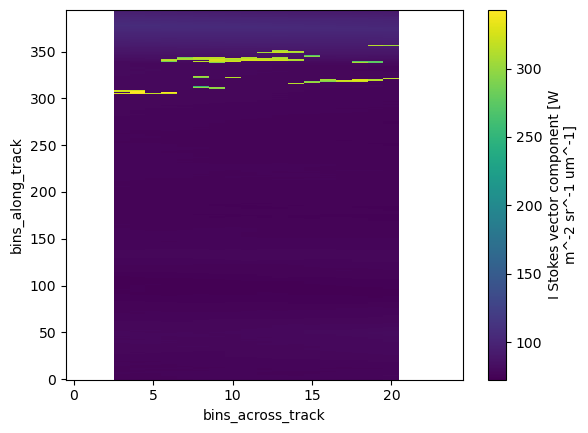

In [21]:
obs_dat.I[:,:,0,50].plot()

In [8]:
sensor_view_bnds = xr.open_dataset(datafile, group='sensor_views_bands')
sensor_view_bnds

<xarray.Dataset>
Dimensions:                   (number_of_views: 5,
                               intensity_bands_per_view: 400,
                               polarization_bands_per_view: 50)
Dimensions without coordinates: number_of_views, intensity_bands_per_view,
                                polarization_bands_per_view
Data variables:
    intensity_bandpasses      (number_of_views, intensity_bands_per_view) float32 ...
    intensity_F0              (number_of_views, intensity_bands_per_view) float32 ...
    intensity_wavelengths     (number_of_views, intensity_bands_per_view) float32 ...
    polarization_bandpasses   (number_of_views, polarization_bands_per_view) float32 ...
    polarization_F0           (number_of_views, polarization_bands_per_view) float32 ...
    polarization_wavelengths  (number_of_views, polarization_bands_per_view) float32 ...
    view_angles               (number_of_views) float32 ...

In [9]:
geo_data = xr.open_dataset(datafile, group='geolocation_data')
geo_data

<xarray.Dataset>
Dimensions:               (bins_along_track: 395, bins_across_track: 25,
                           number_of_views: 5)
Dimensions without coordinates: bins_along_track, bins_across_track,
                                number_of_views
Data variables:
    altitude              (bins_along_track, bins_across_track) float32 ...
    altitude_variability  (bins_along_track, bins_across_track) float32 ...
    latitude              (bins_along_track, bins_across_track) float32 ...
    longitude             (bins_along_track, bins_across_track) float32 ...
    scattering_angle      (bins_along_track, bins_across_track, number_of_views) float32 ...
    sensor_azimuth        (bins_along_track, bins_across_track, number_of_views) float32 ...
    sensor_zenith         (bins_along_track, bins_across_track, number_of_views) float32 ...
    solar_azimuth         (bins_along_track, bins_across_track, number_of_views) float32 ...
    solar_zenith          (bins_along_track, bins_across_track, number_of_views) float32 ...

In [31]:
geo_data.latitude

<xarray.DataArray 'latitude' (bins_along_track: 395, bins_across_track: 25)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Dimensions without coordinates: bins_along_track, bins_across_track
Attributes:
    long_name:  Latitudes of bin locations
    units:      degrees_north
    valid_min:  -90.0
    valid_max:  90.0

In [10]:
bin_attrs = xr.open_dataset(datafile, group='bin_attributes')
bin_attrs

<xarray.Dataset>
Dimensions:            (bins_along_track: 395, bins_across_track: 25,
                        number_of_views: 5)
Dimensions without coordinates: bins_along_track, bins_across_track,
                                number_of_views
Data variables:
    nadir_view_time    (bins_along_track) timedelta64[ns] ...
    view_time_offsets  (bins_along_track, bins_across_track, number_of_views) timedelta64[ns] ...